## Simulación de datos de series de tiempo

### Ruido blanco uniforme y distribuido normalmente, y ruido rosa.

El ruido puede generarse a través de las funciones rand (uniformemente distribuidas) y randn (normalmente [gaussianas] distribuidas).
Las entradas a estas funciones especifican el tamaño de las matrices resultantes.

In [1]:
using PyPlot

In [2]:
Yu=rand(1000,1);
Yn=randn(1000,1);

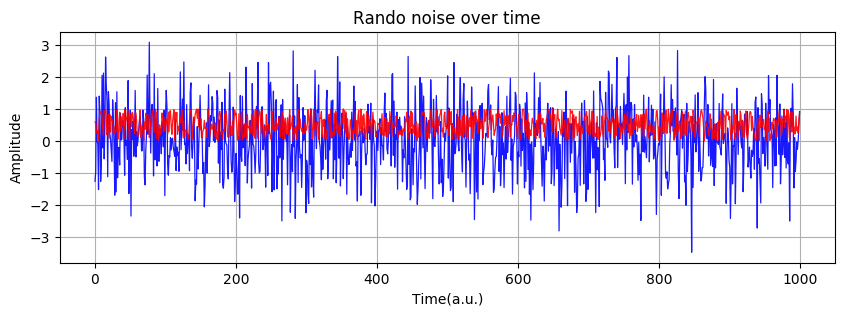

In [3]:
fig = figure("Figure3.1 Uniform and random noise",figsize=(10,3))
plot(Yn, color="blue",linewidth=0.9, alpha=0.9)
plot(Yu, color="red",linewidth=0.9, alpha=0.9)
title("Rando noise over time")
xlabel("Time(a.u.)")
ylabel("Amplitude")
grid("on")

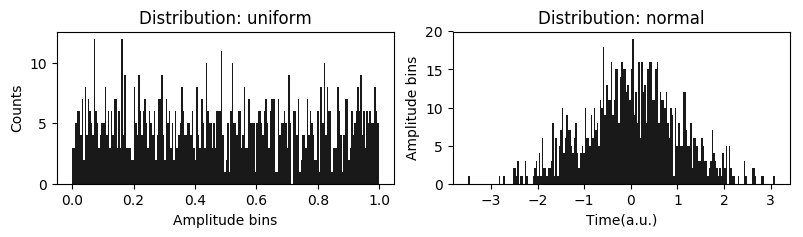

In [4]:
fig = figure("Figure3.1 Uniform and random noise",figsize=(8,4))
subplot(223)
plt[:hist](Yu,200,color="black",linewidth=0.9, alpha=0.9)
title("Distribution: uniform")
xlabel("Amplitude bins")
ylabel("Counts")

subplot(224)
plt[:hist](Yn,200, color="black",linewidth=0.9, alpha=0.9)
title("Distribution: normal")
xlabel("Time(a.u.)")
ylabel("Amplitude bins")

PyPlot.tight_layout(pad=0.6, w_pad=0.6, h_pad=1.0)
fig[:canvas][:draw]() #Actualiza la figura.

El término "ruido blanco" se refiere al ruido que tiene un espectro de potencia plana. Las funciones rand y randn producen datos que tienen espectros de potencia aproximadamente planos y, por lo tanto, pueden considerarse ruido blanco.

El "ruido rosa" se refiere al ruido con una estructura de frecuencia no uniforme, típicamente, que la potencia disminuye con la frecuencia creciente. Hay varias formas de calcular el ruido rosa; uno es aplicar un filtro de frecuencia de fuga. El código se presenta a continuación; FFT significa "Transformada rápida de Fourier".

In [12]:
wn=randn(10000,1);   # White noise
wnX=fft(wn);
pn=real(ifft(wnX.*linspace(-1,1,length(wnX)).^2))*2;

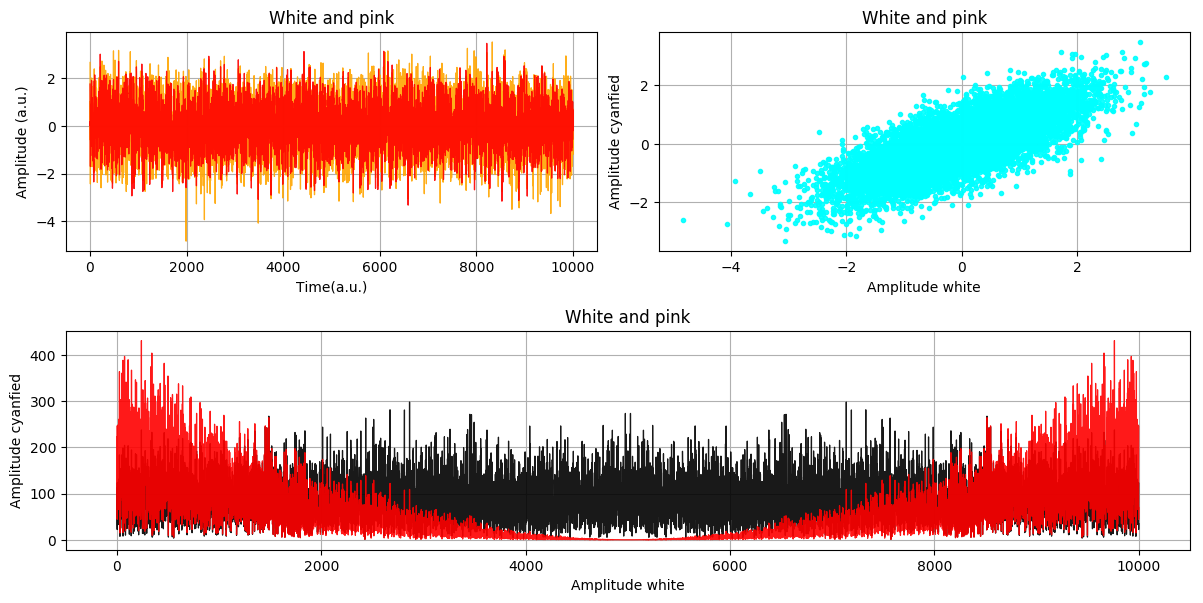

In [13]:
fig = figure("Figure3.2 White noise, pink noise (amp.= amplitude)",figsize=(12,6))

subplot(221)
plot(wn,color="orange",linewidth=0.9, alpha=0.9)
plot(pn,color="red",linewidth=0.9, alpha=0.9)
title("White and pink")
xlabel("Time(a.u.)")
ylabel("Amplitude (a.u.)")
grid("on")

subplot(222)
plot(wn,pn,color="cyan",".", alpha=0.9)
title("White and pink")
xlabel("Amplitude white")
ylabel("Amplitude cyanfied")
grid("on")

subplot(212)
plot(abs.(fft(wn)),color="k",linewidth=0.9,alpha=0.9)
plot(abs.(fft(pn)),color="r",linewidth=0.9,alpha=0.9)
title("White and pink")
xlabel("Amplitude white")
ylabel("Amplitude cyanfied")
grid("on")

PyPlot.tight_layout(pad=0.6, w_pad=0.6, h_pad=1.0)
fig[:canvas][:draw]() #Actualiza la figura.

"a.u." significa "unidades arbitrarias" y se usa a menudo cuando los valores de los ejes no son interpretables o irrelevantes.

### Ondas senoidales

Las ondas senoidales forman la base de muchos análisis de frecuencia y frecuencia de tiempo. Se puede crear una onda senoidal con tres parámetros: frecuencia (la velocidad de la onda sinusoidal), amplitud (la altura o cantidad de energía de la onda sinusoidal) y fase (el tiempo de la onda sinusoidal). La frecuencia es posiblemente el parámetro más importante; la amplitud y la fase pueden establecerse implicitamente o en 0.

La fórmula para una función de onda senoidal del tiempo es: **y = a sen (2 π ft + j)**, donde ** a ** es la amplitud (altura) de la onda senoidal, (que se puede medir como la mitad de la distancia de punta a punta en el eje y), ** p ** es pi (3.1415926535897 ...; los caracteres griegos se evitan aquí para evitar errores tipográficos de lectura), ** t ** es tiempo en segundos, ** f ** es la frecuencia en Hz (1 / segundo), y ** j ** es el ángulo de fase en radianes, que define la amplitud de la onda senoidal cuando pasa por t = 0.

In [14]:
t = collect(0:0.001:5);       # Time: 0 to 5 sec. in 1-ms steps
a = 10;                       # Amplitude
f = 3                         # Frequency in Hz
p = pi/2                      # Phase angle

y=a*sin.(2*pi*f*t*p);          #Sine wave function

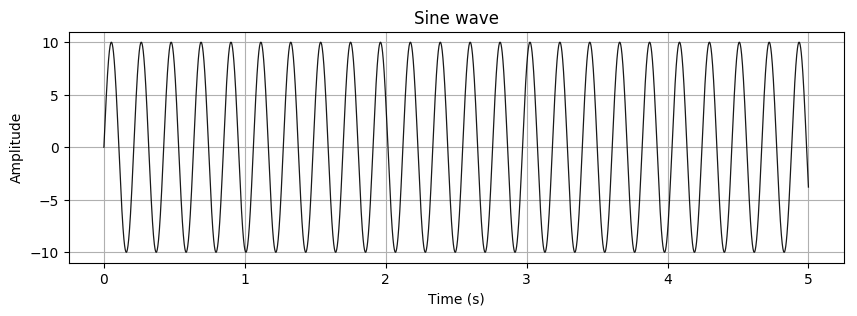

In [27]:
fig = figure("Figure3.3 Sine wave",figsize=(10,3))
plot(t,y, color="black",linewidth=0.9, alpha=0.9)
title("Sine wave")
xlabel("Time (s)")
ylabel("Amplitude")
grid("on")

t es un vector de puntos de tiempo en segundos, en pasos de 0.001 segundos (es decir, 1 ms). Esto significa que la serie de tiempo tiene una frecuencia de muestreo de 1000 Hz, o 1 kHz.

Se pueden sumar ondas sinusoidales múltiples de diferentes amplitudes, fases y frecuencias. Las series de tiempo resultantes pueden ser difíciles de interpretar en el dominio del tiempo, pero las ondas individuales pueden aislarse fácilmente en el dominio de la frecuencia.

In [28]:
t = collect(0:0.001:5);        #Sampling rate of 1000 Hz
n = length(t);
a = [10, 2, 5, 8];
f = [3, 1, 6, 12];
p = [0, pi/4, -pi, pi/2];

swave = zeros(size(t));

for i=1:length(a)
    swave = swave+a[i]*sin.(2*pi*f[i]*t+p[i])
end

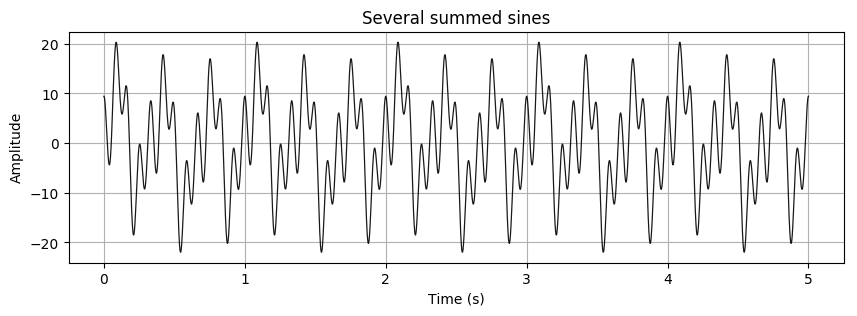

In [29]:
fig = figure("Figure3.4 Several summed sines",figsize=(10,3))
plot(t,swave, color="black",linewidth=0.9, alpha=0.9)
title("Several summed sines")
xlabel("Time (s)")
ylabel("Amplitude")
grid("on")

El ruido se puede agregar a las ondas sinusoidales.

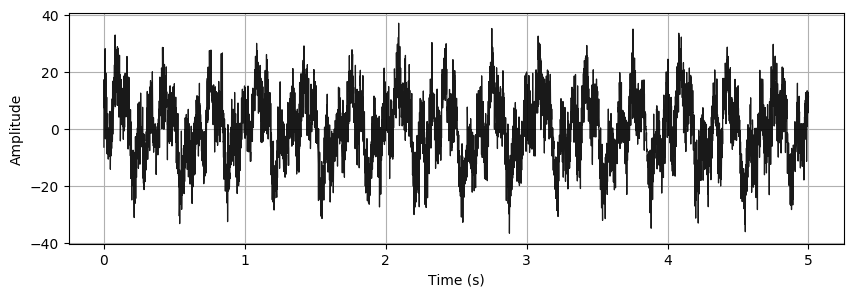

In [30]:
swave=swave+mean(a)*randn(size(t));

fig = figure("Figure X",figsize=(10,3))
plot(t,swave, color="black",linewidth=0.9, alpha=0.9)
xlabel("Time (s)")
ylabel("Amplitude")
grid("on")

Además de las ondas senoidales continuas de múltiples frecuencias simultáneamente, las ondas senoidales también pueden contener cambios repentinos en la frecuencia y en la amplitud.